In [ ]:
import pandas as pd
import numpy as np
print("✅ Kernel & Library Berjalan Normal!")


: 

In [2]:
pip install numpy pandas matplotlib pmdarima statsmodels scikit-learn openpyxl


Note: you may need to restart the kernel to use updated packages.


📅 Contoh data dari file Excel:


,Jumlah_Pengunjung
Tanggal,
2025-05-01,61
2025-05-02,68
2025-05-03,72
2025-05-04,70
2025-05-05,57


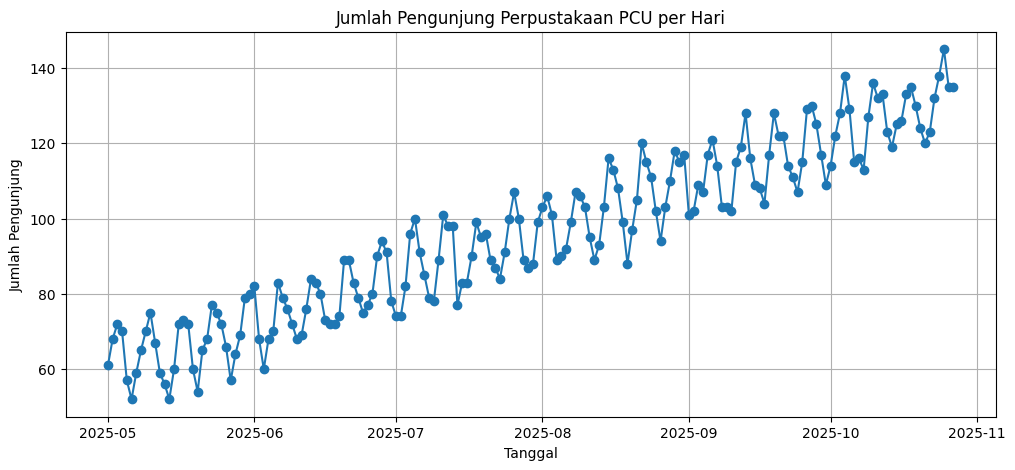

Data Training: 144 data
Data Testing : 36 data

🔍 Menjalankan auto_arima untuk mencari parameter terbaik...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=980.814, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=862.289, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=934.113, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=979.293, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=973.472, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=934.192, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=881.717, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=846.832, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=968.022, Time=0.05 sec
 ARIMA(2,1,0)(2,0,0)

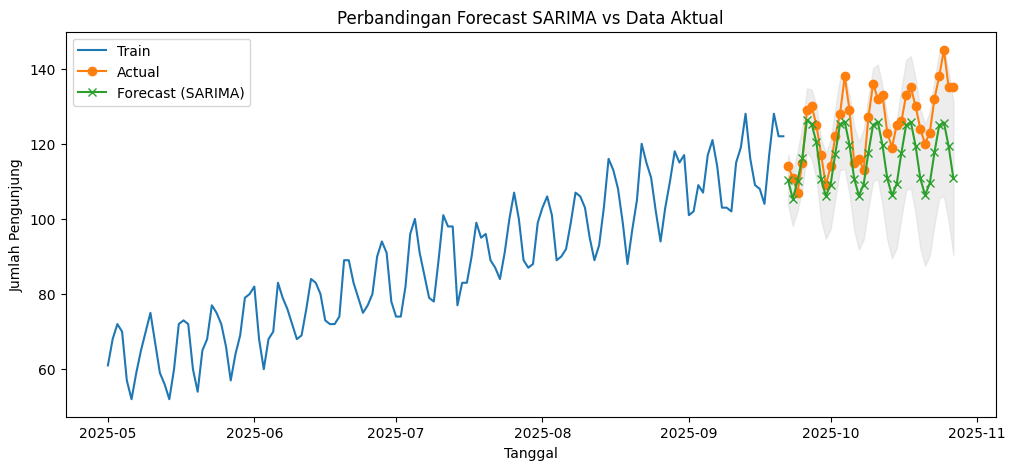

📉 RMSE (Root Mean Squared Error): 10.568

🔮 Forecast 6 Hari ke Depan (Model SARIMA):


,Forecast_Jumlah_Pengunjung,Batas_Bawah,Batas_Atas
Tanggal,,,
2025-10-28,110,104,117
2025-10-29,105,98,113
2025-10-30,110,102,118
2025-10-31,116,108,124
2025-11-01,126,118,135
2025-11-02,125,116,134


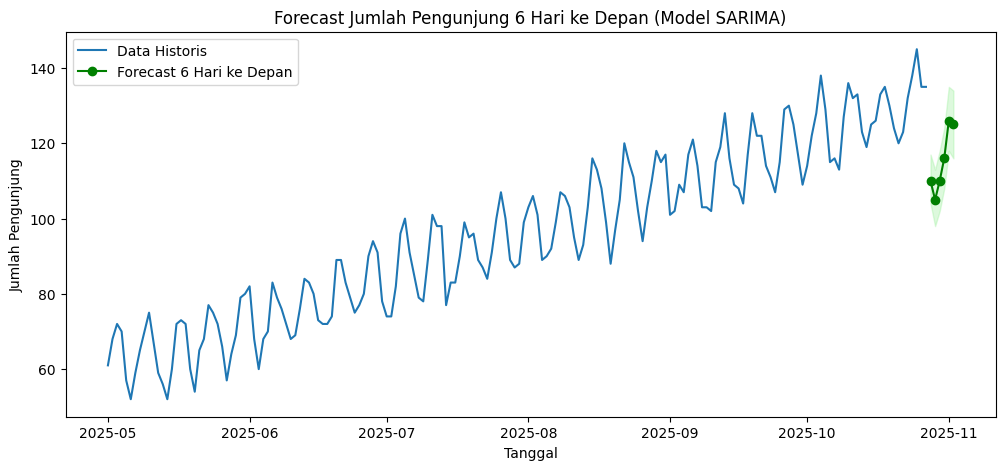

✅ Analisis Forecasting SARIMA selesai dengan sukses!


In [5]:
# ================================================================
# 📗 SARIMA Forecasting - Proyek Sistem Informasi Manufaktur (SIMF)
# ================================================================

# ------------------------------------------------
# 2️⃣ IMPORT LIBRARY
# ------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------
# 4️⃣ MEMBACA DATA DARI FILE EXCEL
# ------------------------------------------------
data = pd.read_excel(excel_filename, parse_dates=['Tanggal'])
data.set_index('Tanggal', inplace=True)

print("📅 Contoh data dari file Excel:")
display(data.head())

# ------------------------------------------------
# 5️⃣ VISUALISASI DATA
# ------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Jumlah_Pengunjung'], marker='o')
plt.title("Jumlah Pengunjung Perpustakaan PCU per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.grid(True)
plt.show()

# ------------------------------------------------
# 6️⃣ PEMBAGIAN DATA TRAIN & TEST
# ------------------------------------------------
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

print(f"Data Training: {len(train)} data")
print(f"Data Testing : {len(test)} data")

# ------------------------------------------------
# 7️⃣ CARI PARAMETER TERBAIK OTOMATIS (auto_arima)
# ------------------------------------------------
print("\n🔍 Menjalankan auto_arima untuk mencari parameter terbaik...")
model_auto = auto_arima(
    train,
    seasonal=True,
    m=7,  # karena pola musiman mingguan (7 hari)
    trace=True,
    suppress_warnings=True
)

print("\n📊 Parameter terbaik hasil auto_arima:")
print(model_auto.summary())

order = model_auto.order
seasonal_order = model_auto.seasonal_order
print(f"\nMenggunakan parameter SARIMA{order}x{seasonal_order}")

# ------------------------------------------------
# 8️⃣ FIT MODEL SARIMA
# ------------------------------------------------
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# ------------------------------------------------
# 9️⃣ FORECASTING (UJI DENGAN DATA TEST)
# ------------------------------------------------
forecast = sarima_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Jumlah_Pengunjung'], label='Train')
plt.plot(test.index, test['Jumlah_Pengunjung'], label='Actual', marker='o')
plt.plot(test.index, forecast_mean, label='Forecast (SARIMA)', marker='x')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgray', alpha=0.4)
plt.title("Perbandingan Forecast SARIMA vs Data Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.legend()
plt.show()

# ------------------------------------------------
# 🔟 MENGHITUNG NILAI RMSE
# ------------------------------------------------
rmse = math.sqrt(mean_squared_error(test, forecast_mean))
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.3f}")

# ------------------------------------------------
# 1️⃣1️⃣ FORECAST UNTUK 6 PERIODE KE DEPAN
# ------------------------------------------------
forecast_next = sarima_result.get_forecast(steps=6)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=6)
forecast_next_mean = forecast_next.predicted_mean
forecast_next_ci = forecast_next.conf_int()

forecast_table = pd.DataFrame({
    'Tanggal': future_dates,
    'Forecast_Jumlah_Pengunjung': np.round(forecast_next_mean.values, 0).astype(int),
    'Batas_Bawah': np.round(forecast_next_ci.iloc[:, 0].values, 0).astype(int),
    'Batas_Atas': np.round(forecast_next_ci.iloc[:, 1].values, 0).astype(int)
})
forecast_table.set_index('Tanggal', inplace=True)

print("\n🔮 Forecast 6 Hari ke Depan (Model SARIMA):")
display(forecast_table)

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Jumlah_Pengunjung'], label='Data Historis')
plt.plot(forecast_table.index, forecast_table['Forecast_Jumlah_Pengunjung'],
         label='Forecast 6 Hari ke Depan', marker='o', color='green')
plt.fill_between(forecast_table.index, forecast_table['Batas_Bawah'], forecast_table['Batas_Atas'],
                 color='lightgreen', alpha=0.3)
plt.title("Forecast Jumlah Pengunjung 6 Hari ke Depan (Model SARIMA)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.legend()
plt.show()

# ------------------------------------------------
# ✅ SELESAI
# ------------------------------------------------
print("✅ Analisis Forecasting SARIMA selesai dengan sukses!")
